In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/crop final 5.csv')

In [ ]:
data.head()

Crop  Soil_pH  Organic_Matter_Percent  N_Content_mgkg  P_Content_mgkg  \
0      Corn     6.22                    3.06           127.4            50.1   
1      Rice     6.08                    3.40           100.5            23.6   
2  Soybeans     6.52                    4.15            46.3            64.2   
3      Rice     6.56                    3.39           119.7            34.8   
4      Rice     5.77                    3.79           116.2            39.1   

   K_Content_mgkg  Rainfall_mm  Temperature_C  Yield_Tons_per_ha  \
0           130.7        663.8           22.3               6.64   
1           130.4        923.6           23.0               4.90   
2           185.5        423.0           22.7               2.92   
3           124.9        981.9           22.5               5.00   
4           196.3        942.3           24.7               5.17   

  Fertilizer_Recommendation  
0      No fertilizer needed  
1      No fertilizer needed  
2      No fertilizer needed  
3      No fertilizer needed  
4      No fertilizer needed

In [ ]:
data.shape

(2000, 10)

In [ ]:
data.columns

Index(['Crop', 'Soil_pH', 'Organic_Matter_Percent', 'N_Content_mgkg',
       'P_Content_mgkg', 'K_Content_mgkg', 'Rainfall_mm', 'Temperature_C',
       'Yield_Tons_per_ha', 'Fertilizer_Recommendation'],
      dtype='object')

In [ ]:
data['Crop'].unique()

array(['Corn', 'Rice', 'Soybeans', 'Wheat'], dtype=object)

In [ ]:
data['Fertilizer_Recommendation'].unique()

array(['No fertilizer needed', 'Need P fertilizer',
       'Need N-P complex fertilizer', 'Need N fertilizer',
       'Need K fertilizer', 'Need K-N complex fertilizer',
       'Need K-P complex fertilizer'], dtype=object)

In [ ]:
data.isnull().sum()

Crop                         0
Soil_pH                      0
Organic_Matter_Percent       0
N_Content_mgkg               0
P_Content_mgkg               0
K_Content_mgkg               0
Rainfall_mm                  0
Temperature_C                0
Yield_Tons_per_ha            0
Fertilizer_Recommendation    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop                       2000 non-null   object 
 1   Soil_pH                    2000 non-null   float64
 2   Organic_Matter_Percent     2000 non-null   float64
 3   N_Content_mgkg             2000 non-null   float64
 4   P_Content_mgkg             2000 non-null   float64
 5   K_Content_mgkg             2000 non-null   float64
 6   Rainfall_mm                2000 non-null   float64
 7   Temperature_C              2000 non-null   float64
 8   Yield_Tons_per_ha          2000 non-null   float64
 9   Fertilizer_Recommendation  2000 non-null   object 
dtypes: float64(8), object(2)
memory usage: 156.4+ KB


In [ ]:
data.describe()

Soil_pH  Organic_Matter_Percent  N_Content_mgkg  P_Content_mgkg  \
count  2000.000000             2000.000000     2000.000000     2000.000000   
mean      6.416435                3.503250      100.676200       37.964300   
std       0.561853                0.816781       29.740863       12.217291   
min       4.290000                0.910000       15.700000        3.000000   
25%       6.040000                2.950000       80.150000       29.700000   
50%       6.440000                3.510000      101.650000       37.600000   
75%       6.790000                4.080000      120.225000       45.300000   
max       8.090000                6.160000      201.200000       83.100000   

       K_Content_mgkg  Rainfall_mm  Temperature_C  Yield_Tons_per_ha  
count     2000.000000  2000.000000    2000.000000        2000.000000  
mean       185.013400   698.174600      22.021750           4.674595  
std         38.651282   143.279053       3.056952           1.176251  
min         83.800000   363.600000      12.300000           2.810000  
25%        157.775000   592.250000      19.800000           3.320000  
50%        183.150000   671.550000      22.200000           4.610000  
75%        210.325000   796.900000      24.200000           5.230000  
max        322.600000  1139.000000      30.900000           6.810000

In [ ]:
# Check for duplicate values
duplicates = data.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')



Total duplicate rows: 0


In [ ]:
# Check for null values
null_values = data.isnull().sum()
print('Null values in each column:')
print(null_values)

Null values in each column:
Crop                         0
Soil_pH                      0
Organic_Matter_Percent       0
N_Content_mgkg               0
P_Content_mgkg               0
K_Content_mgkg               0
Rainfall_mm                  0
Temperature_C                0
Yield_Tons_per_ha            0
Fertilizer_Recommendation    0
dtype: int64


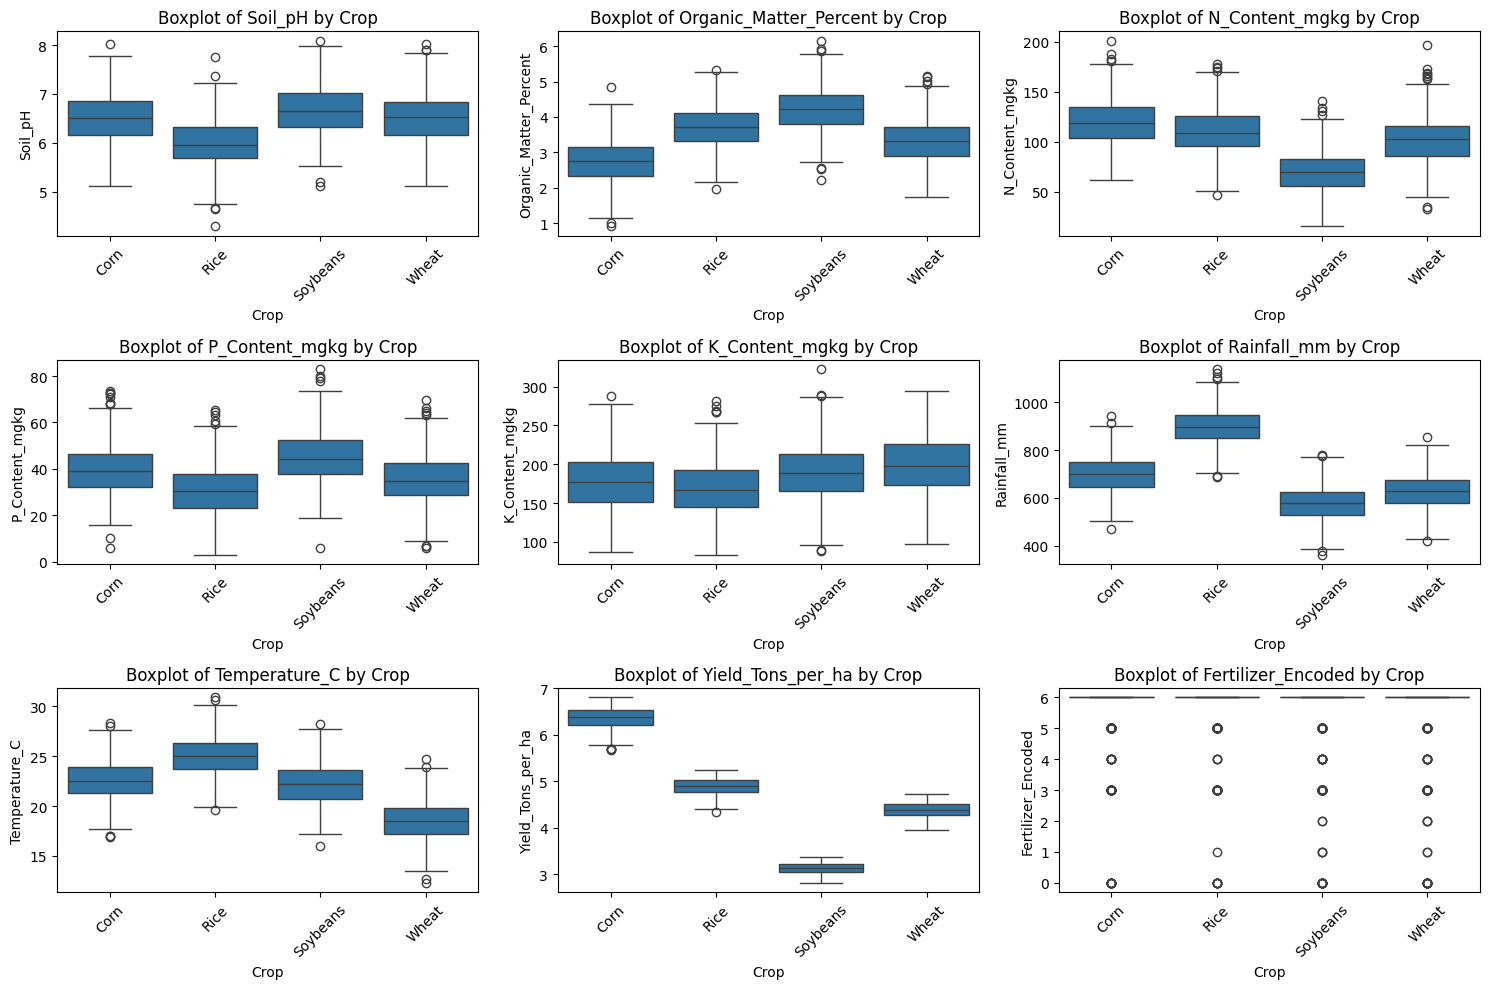

In [ ]:
import seaborn as sns

# Encode the Fertilizer_Recommendation column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Fertilizer_Encoded'] = le.fit_transform(data['Fertilizer_Recommendation'])

# Generate boxplots for all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=column, x='Crop')
    plt.title(f'Boxplot of {column} by Crop')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


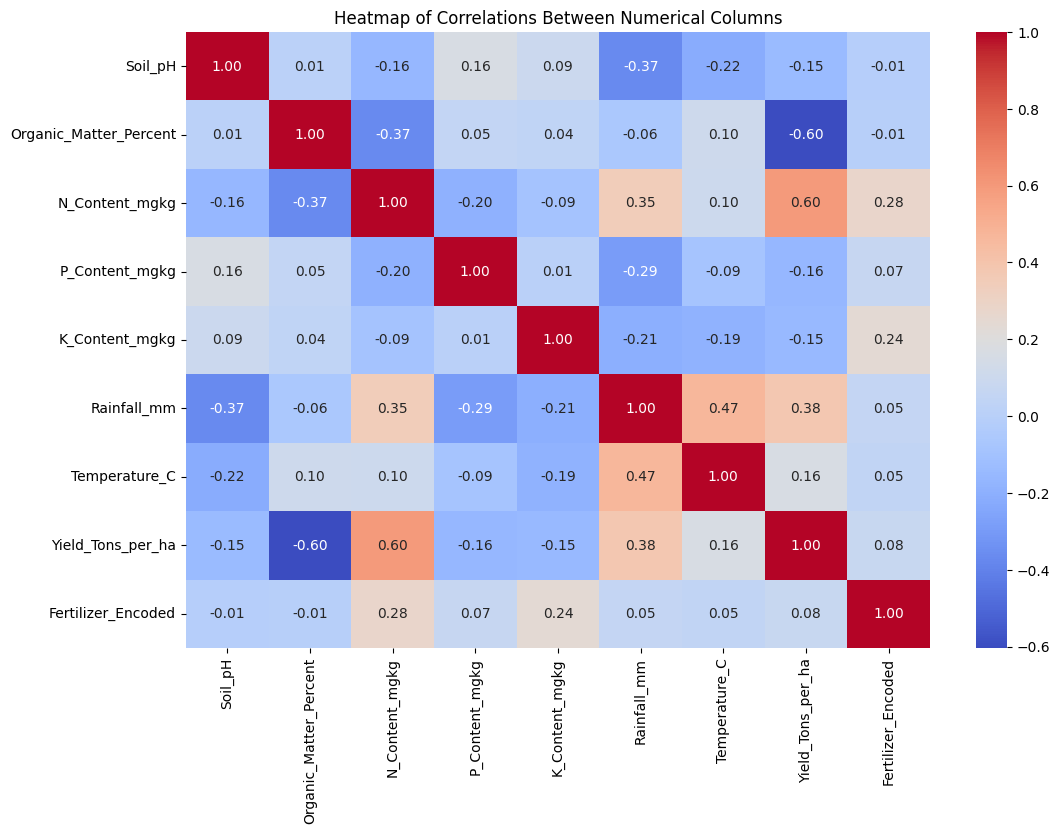

In [ ]:
# Plot a heatmap for all numerical columns to check relationships
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations Between Numerical Columns')
plt.show()


<ipython-input-47-13b11bf15153>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)
<ipython-input-47-13b11bf15153>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)


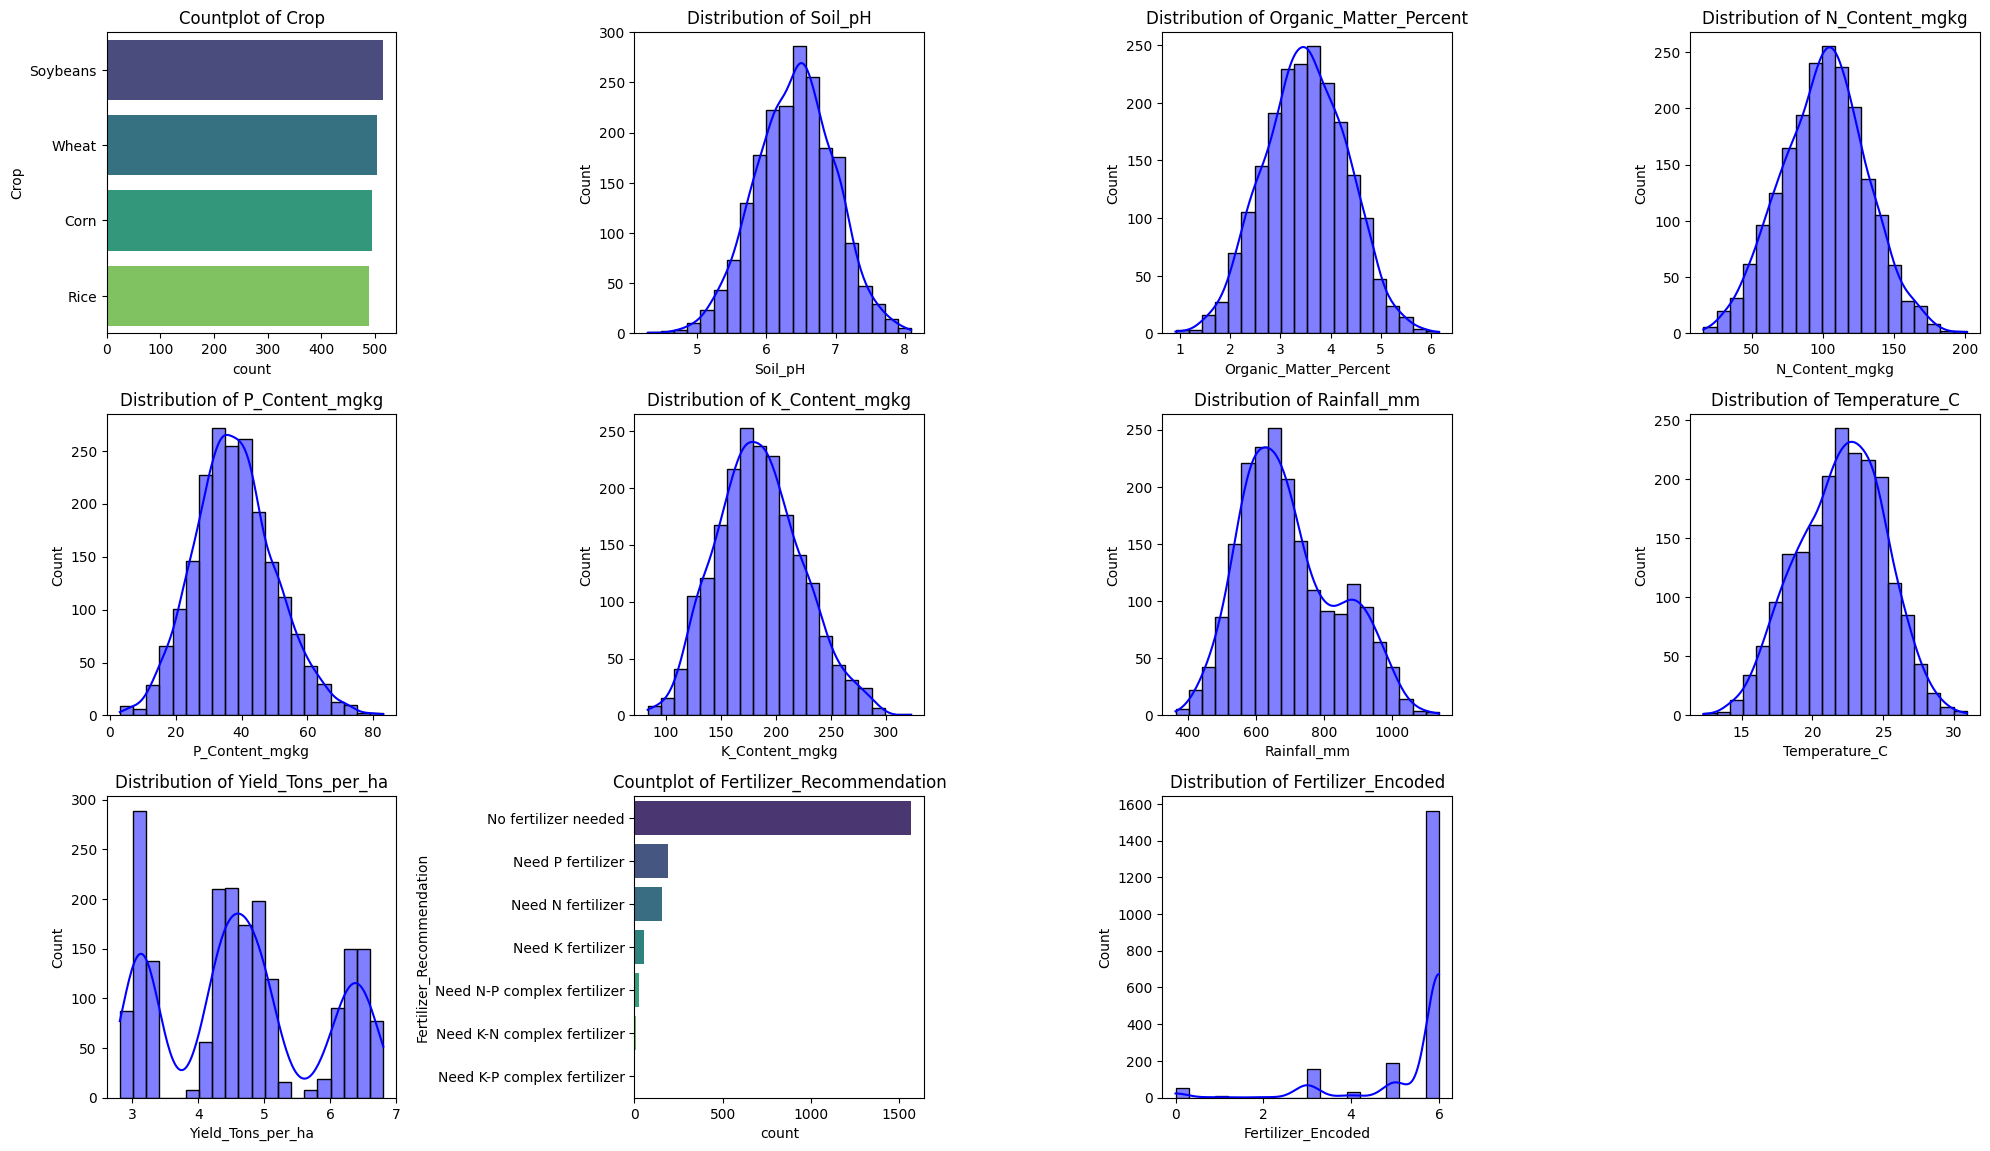

In [ ]:
# Univariate graphs for all columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    if data[column].dtype in ['float64', 'int64']:
        sns.histplot(data[column], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {column}')
    else:
        sns.countplot(y=data[column], palette='viridis', order=data[column].value_counts().index)
        plt.title(f'Countplot of {column}')
    plt.tight_layout()
plt.show()

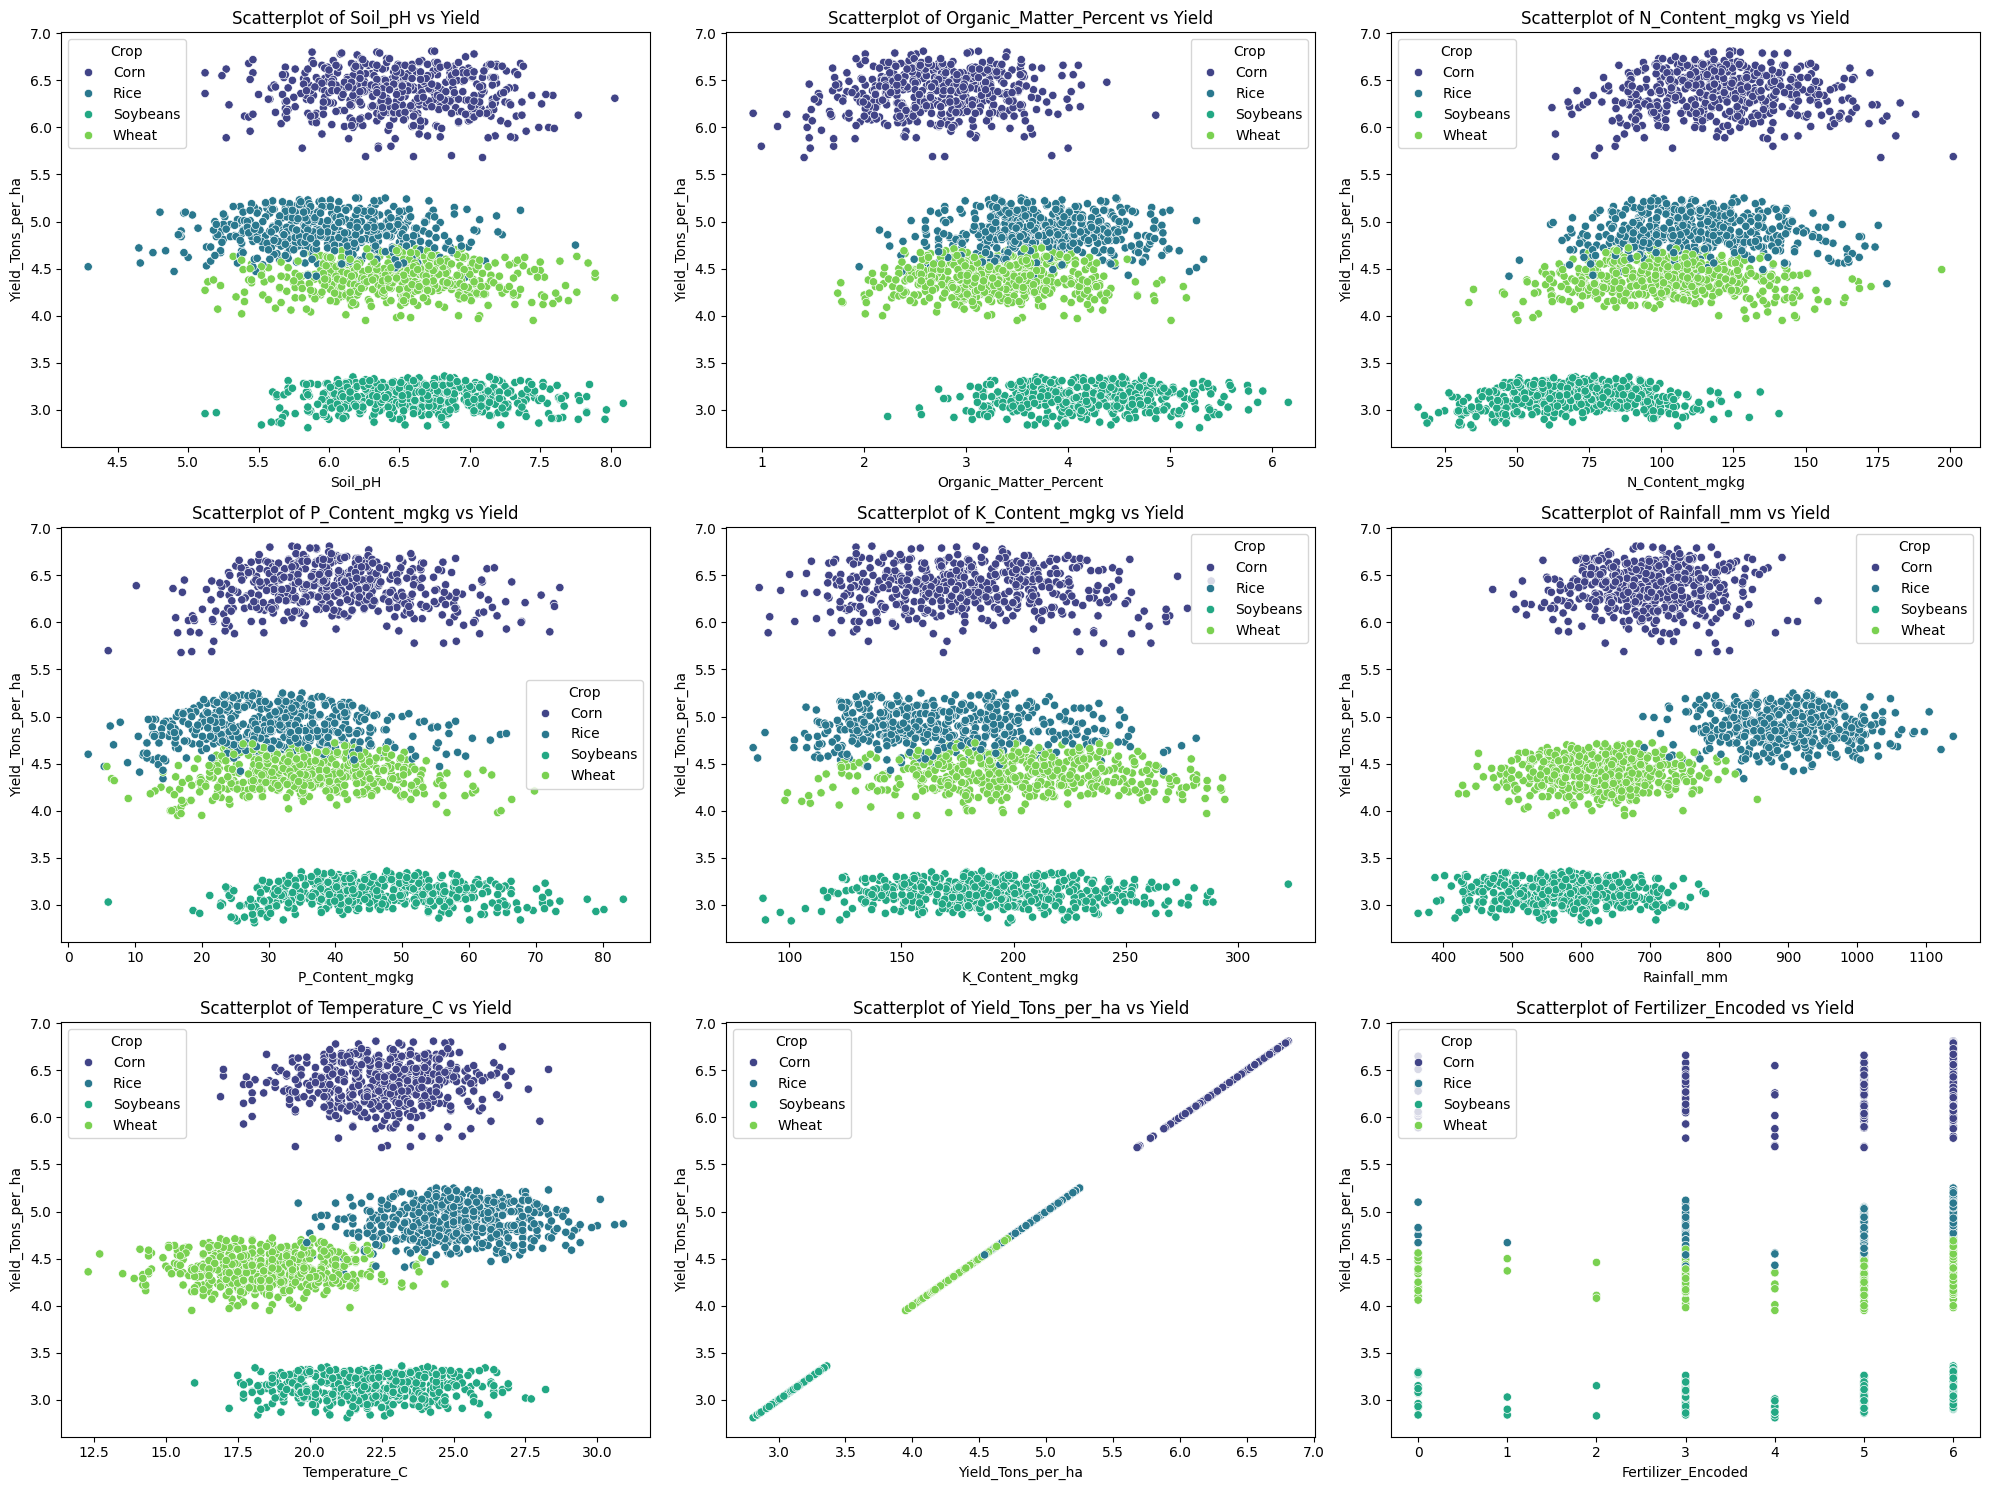

In [ ]:
# Bivariate graphs
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x=column, y='Yield_Tons_per_ha', hue='Crop', palette='viridis')
    plt.title(f'Scatterplot of {column} vs Yield')
plt.tight_layout()
plt.show()




<Figure size 1200x800 with 0 Axes>

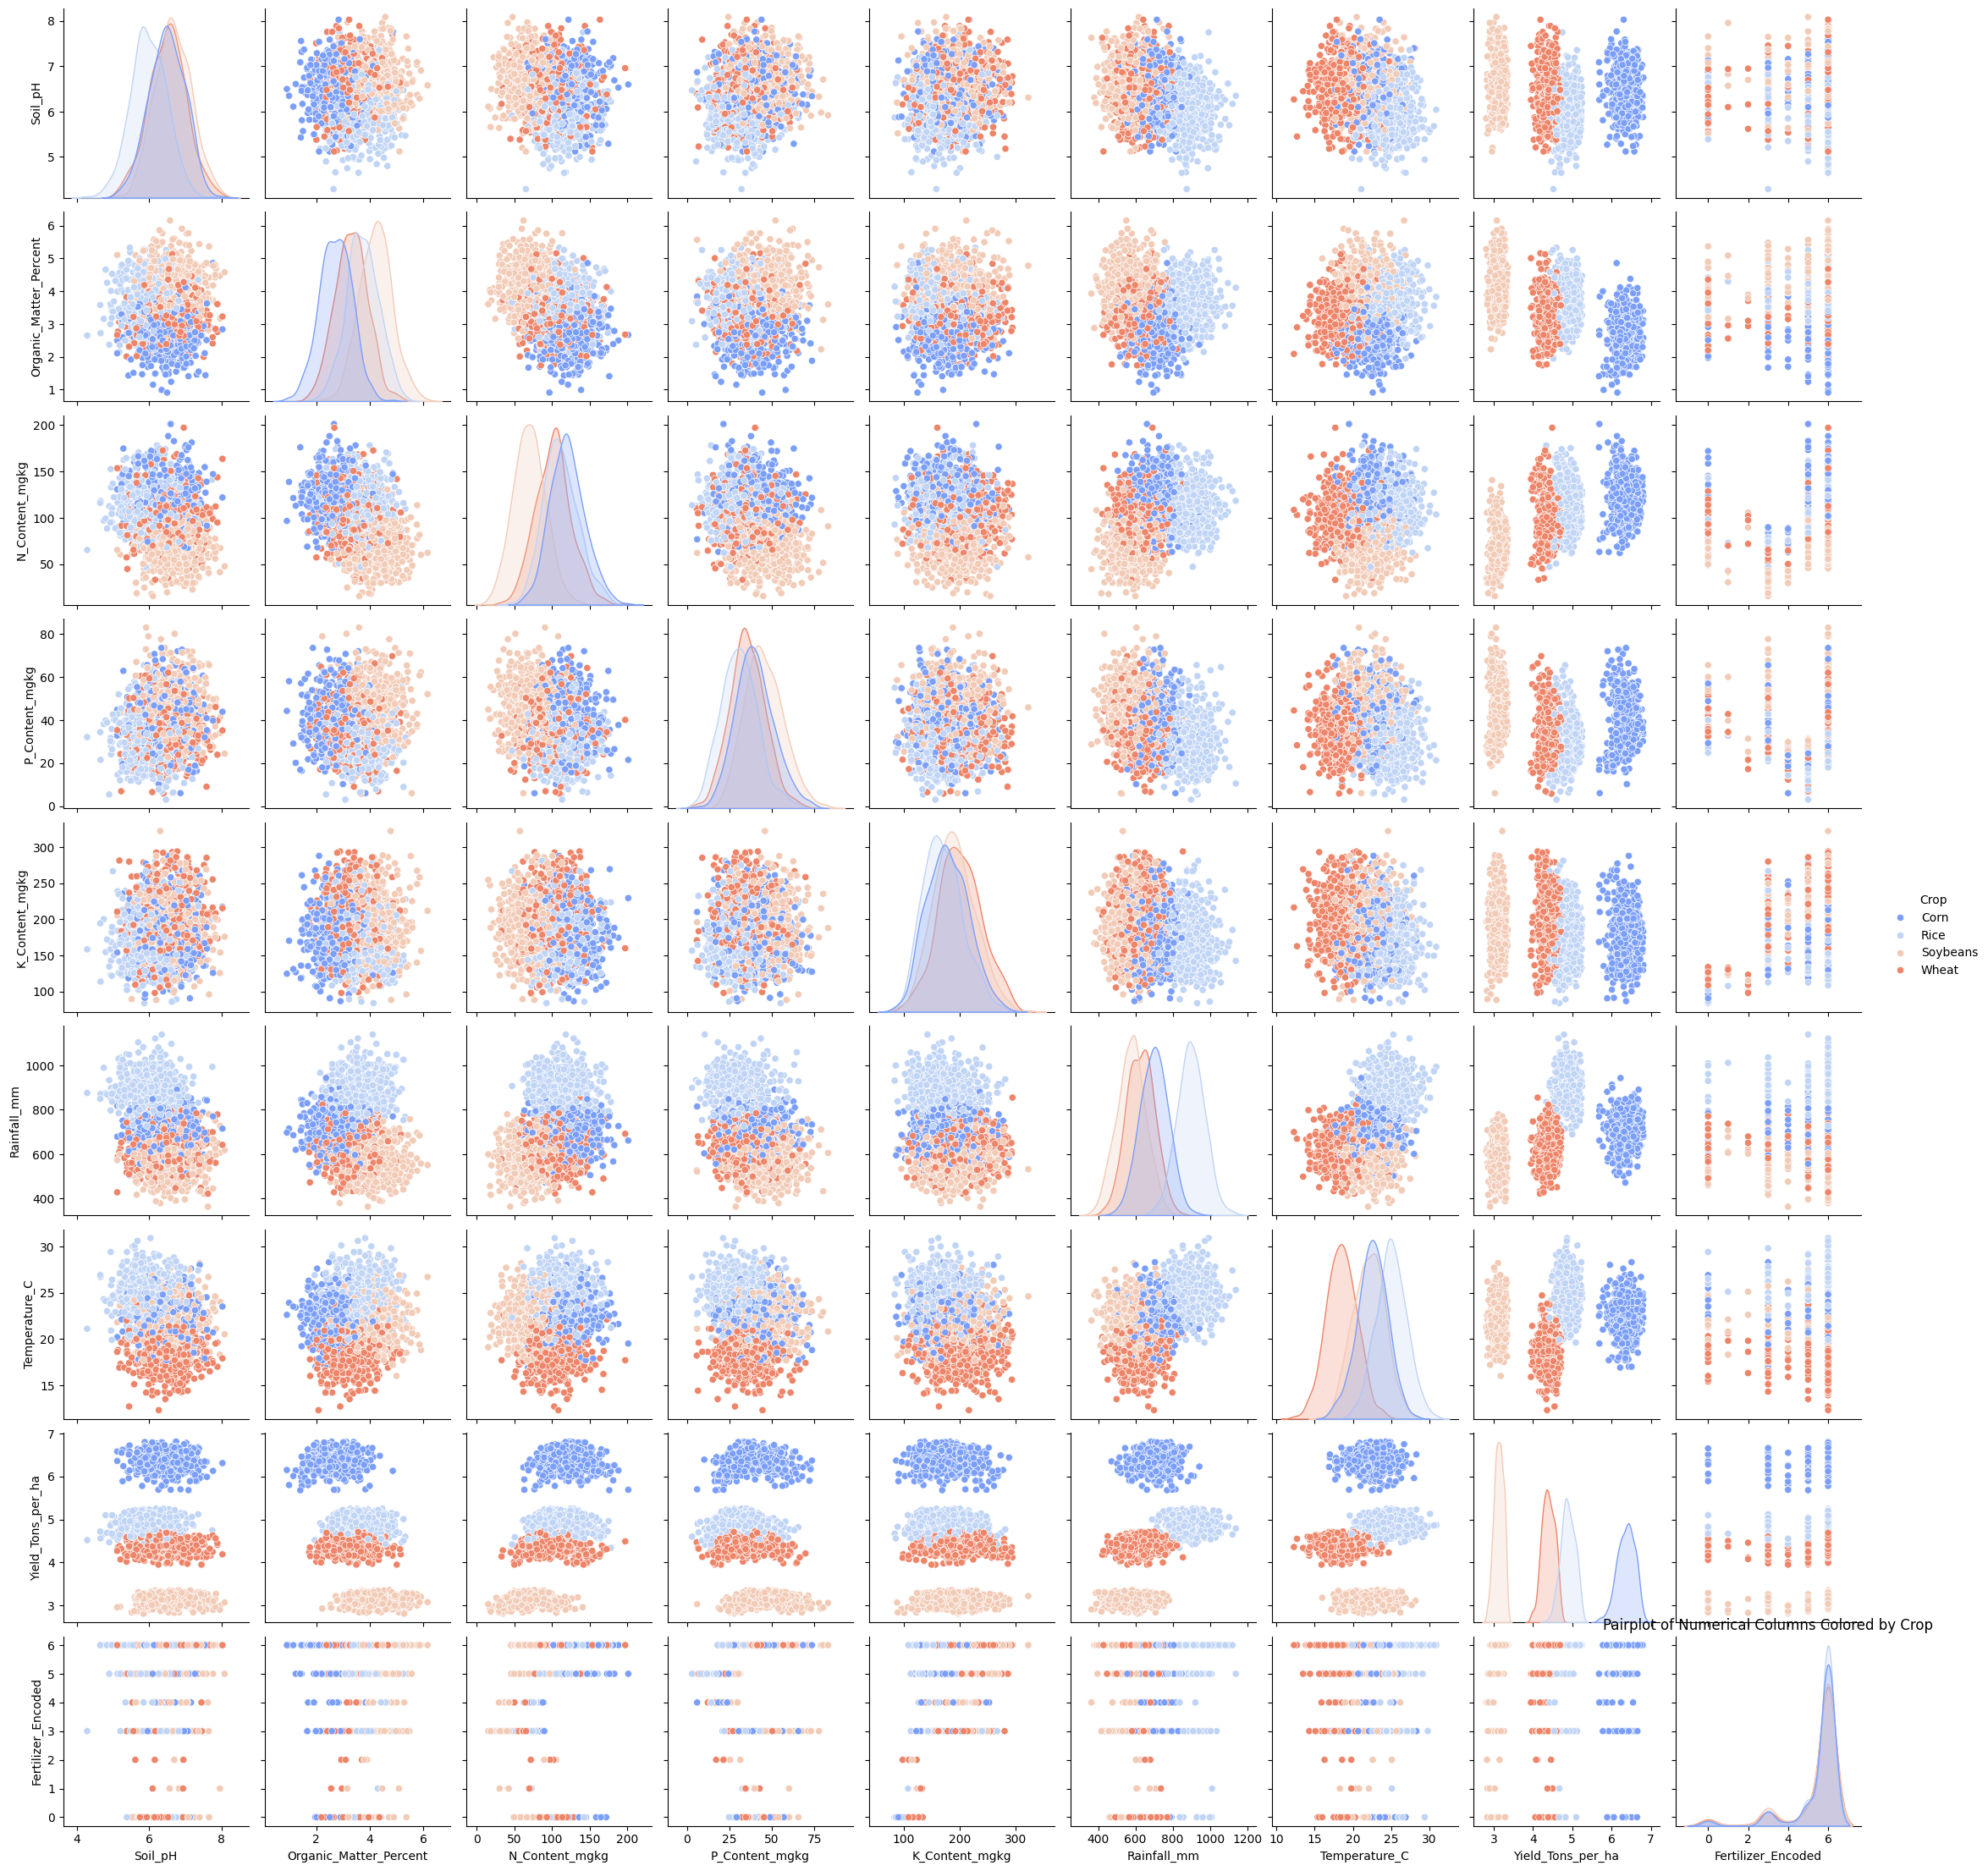

In [ ]:
# Multivariate graph
plt.figure(figsize=(12, 8))
sns.pairplot(data=data, hue='Crop', palette='coolwarm', diag_kind='kde')
plt.title('Pairplot of Numerical Columns Colored by Crop')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report



# Prepare data for Random Forest model
features = data.drop(columns=['Yield_Tons_per_ha', 'Fertilizer_Recommendation', 'Crop'])
target_yield = data['Yield_Tons_per_ha']
target_fertilizer = data['Fertilizer_Encoded']

# Split data for yield prediction
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(features, target_yield, test_size=0.2, random_state=42)

# Train Random Forest model for yield prediction
rf_yield = RandomForestRegressor(random_state=42, n_estimators=100)
rf_yield.fit(X_train_y, y_train_y)

# Predict and evaluate yield prediction
predictions_yield = rf_yield.predict(X_test_y)
print("Yield Prediction:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, predictions_yield):.2f}")
print(f"R2 Score: {r2_score(y_test_y, predictions_yield):.2f}")

# Split data for fertilizer recommendation
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features, target_fertilizer, test_size=0.2, random_state=42)

# Train Random Forest model for fertilizer recommendation
rf_fertilizer = RandomForestRegressor(random_state=42, n_estimators=100)
rf_fertilizer.fit(X_train_f, y_train_f)

# Predict and evaluate fertilizer recommendation
predictions_fertilizer = rf_fertilizer.predict(X_test_f)
print("Fertilizer Recommendation:")
print(classification_report(y_test_f, predictions_fertilizer.round()))


Yield Prediction:
Mean Squared Error: 0.32
R2 Score: 0.76
Fertilizer Recommendation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00       314

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Data preparation
features = data.drop(columns=['Yield_Tons_per_ha', 'Fertilizer_Recommendation', 'Crop'])
target_yield = data['Yield_Tons_per_ha']
target_fertilizer = data['Fertilizer_Encoded']

# Splitting data for yield prediction
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(features, target_yield, test_size=0.2, random_state=42)

# Hyperparameter tuning for yield prediction model
param_grid_yield = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

print("Performing GridSearchCV for Yield Prediction...")
rf_yield = RandomForestRegressor(random_state=42)
grid_search_yield = GridSearchCV(estimator=rf_yield, param_grid=param_grid_yield, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search_yield.fit(X_train_y, y_train_y)

# Train and save the best model for yield prediction
best_rf_yield = grid_search_yield.best_estimator_
best_rf_yield.fit(X_train_y, y_train_y)
joblib.dump(best_rf_yield, 'best_rf_yield_model.pkl')
print("Yield prediction model saved as 'best_rf_yield_model.pkl'.")

# Evaluate yield prediction model
predictions_yield = best_rf_yield.predict(X_test_y)
print("Yield Prediction Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, predictions_yield):.2f}")
print(f"R2 Score: {r2_score(y_test_y, predictions_yield):.2f}")

# Splitting data for fertilizer recommendation
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features, target_fertilizer, test_size=0.2, random_state=42)

# Training fertilizer recommendation model
rf_fertilizer = RandomForestRegressor(random_state=42, n_estimators=100)
rf_fertilizer.fit(X_train_f, y_train_f)

# Save the fertilizer recommendation model
joblib.dump(rf_fertilizer, 'rf_fertilizer_model.pkl')
print("Fertilizer recommendation model saved as 'rf_fertilizer_model.pkl'.")

# Evaluate fertilizer recommendation model
predictions_fertilizer = rf_fertilizer.predict(X_test_f)
print("Fertilizer Recommendation Results:")
print(classification_report(y_test_f, predictions_fertilizer.round()))

# File structure and usage
print("Both models have been saved. You can load them as follows:")
print("1. Yield Model: joblib.load('best_rf_yield_model.pkl')")
print("2. Fertilizer Model: joblib.load('rf_fertilizer_model.pkl')")


Performing GridSearchCV for Yield Prediction...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Yield prediction model saved as 'best_rf_yield_model.pkl'.
Yield Prediction Results:
Mean Squared Error: 0.32
R2 Score: 0.76
Fertilizer recommendation model saved as 'rf_fertilizer_model.pkl'.
Fertilizer Recommendation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00       314

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Both models have been saved. You can load them as follows:
1. Yield Model: joblib.load('best_rf_yield_model.pkl')
2. Fer

test train


In [ ]:
import joblib
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler

# Data preparation
# Assuming `data` is a pandas DataFrame loaded earlier
features = data.drop(columns=['Yield_Tons_per_ha', 'Fertilizer_Recommendation', 'Crop'])
target_yield = data['Yield_Tons_per_ha']
target_fertilizer = data['Fertilizer_Encoded']

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting data for yield prediction
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    features_scaled, target_yield, test_size=0.2, random_state=42, shuffle=True
)

# Enhanced hyperparameter grid for yield prediction
param_grid_yield = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Yield prediction model with cross-validation
print("Performing GridSearchCV for Yield Prediction...")
rf_yield = RandomForestRegressor(random_state=42)
grid_search_yield = GridSearchCV(
    estimator=rf_yield,
    param_grid=param_grid_yield,
    cv=5,  # Increased from 3 to 5
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid_search_yield.fit(X_train_y, y_train_y)

# Train and save the best model for yield prediction
best_rf_yield = grid_search_yield.best_estimator_
print("\nBest parameters for yield prediction:", grid_search_yield.best_params_)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_rf_yield, X_train_y, y_train_y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

# Evaluate yield prediction model
train_predictions_yield = best_rf_yield.predict(X_train_y)
test_predictions_yield = best_rf_yield.predict(X_test_y)

print("\nYield Prediction Results:")
print("\nTraining Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train_y, train_predictions_yield):.3f}")
print(f"R2 Score: {r2_score(y_train_y, train_predictions_yield):.3f}")
print("\nTesting Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, test_predictions_yield):.3f}")
print(f"R2 Score: {r2_score(y_test_y, test_predictions_yield):.3f}")

# Save yield prediction model and scaler
joblib.dump(best_rf_yield, 'best_rf_yield_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Splitting data for fertilizer recommendation
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    features_scaled, target_fertilizer, test_size=0.2, random_state=42, shuffle=True
)

# Enhanced parameters for fertilizer recommendation
rf_fertilizer = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Add regularization through bootstrap aggregating (bagging)
rf_fertilizer.fit(X_train_f, y_train_f)

# Evaluate fertilizer recommendation model
train_predictions_fertilizer = rf_fertilizer.predict(X_train_f)
test_predictions_fertilizer = rf_fertilizer.predict(X_test_f)

print("\nFertilizer Recommendation Results:")
print("\nTraining Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train_f, train_predictions_fertilizer):.3f}")
print(f"R2 Score: {r2_score(y_train_f, train_predictions_fertilizer):.3f}")
print("\nTesting Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test_f, test_predictions_fertilizer):.3f}")
print(f"R2 Score: {r2_score(y_test_f, test_predictions_fertilizer):.3f}")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf_fertilizer.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

# Save the fertilizer recommendation model
joblib.dump(rf_fertilizer, 'rf_fertilizer_model.pkl')

# Classification metrics for fertilizer recommendation
train_predictions_fertilizer_rounded = np.round(train_predictions_fertilizer)
test_predictions_fertilizer_rounded = np.round(test_predictions_fertilizer)

print("\nClassification Report for Fertilizer Recommendation (Testing Data):")
print(classification_report(y_test_f, test_predictions_fertilizer_rounded))

Performing GridSearchCV for Yield Prediction...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best parameters for yield prediction: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Cross-validation scores: [0.85744447 0.8645664  0.84249357 0.8921396  0.86298818]
Average CV score: 0.8639264448758031

Yield Prediction Results:

Training Metrics:
Mean Squared Error: 0.010
R2 Score: 0.992

Testing Metrics:
Mean Squared Error: 0.179
R2 Score: 0.833

Fertilizer Recommendation Results:

Training Metrics:
Mean Squared Error: 0.031
R2 Score: 0.995

Testing Metrics:
Mean Squared Error: 0.073
R2 Score: 0.988

Top 10 Most Important Features:
                  feature  importance
7      Fertilizer_Encoded    0.602252
4          K_Content_mgkg    0.199289
2          N_Content_mgkg    0.095863
3          P_Content_mgkg    0.052590
5             Rainfall_mm    0.019183
1  Organic_Matter_Percent    0.011

In [ ]:
import joblib
import pandas as pd
import numpy as np
from datetime import datetime

def get_crop_selection():
    """Handle crop selection with proper input validation"""
    crops = ['Corn', 'Rice', 'Soybeans', 'Wheat']
    while True:
        print("\nAvailable crops:")
        for i, crop in enumerate(crops, 1):
            print(f"{i}. {crop}")

        try:
            choice = input("\nSelect crop (1-4): ")
            choice_num = int(choice)
            if 1 <= choice_num <= 4:
                return crops[choice_num - 1]
            else:
                print("Please enter a number between 1 and 4.")
        except ValueError:
            if choice in crops:
                return choice
            print("Invalid input. Please enter a number between 1 and 4 or the crop name.")

def validate_input(value, min_val, max_val, name):
    """Validate if input is within acceptable range"""
    try:
        value = float(value)
        if not min_val <= value <= max_val:
            raise ValueError(f"{name} should be between {min_val} and {max_val}")
        return value
    except ValueError:
        raise ValueError(f"Please enter a valid number for {name}")

def predict_crop():
    try:
        # Load the models and scaler
        print("Loading models...")
        yield_model = joblib.load('best_rf_yield_model.pkl')
        fertilizer_model = joblib.load('rf_fertilizer_model.pkl')
        scaler = joblib.load('scaler.pkl')
        print("Models loaded successfully!")

        # Get crop selection
        selected_crop = get_crop_selection()

        # Get user input for each feature
        print("\nPlease enter the following soil and environmental parameters:")

        # Create input data dictionary with correct feature names
        input_data = {
            'Crop': selected_crop,
            'Soil_pH': validate_input(
                input("\nEnter soil pH (5.5-7.5): "),
                5.5, 7.5, "Soil pH"
            ),
            'Organic_Matter_Percent': validate_input(
                input("Enter organic matter percentage (1-6): "),
                1, 6, "Organic matter"
            ),
            'N_Content_mgkg': validate_input(
                input("Enter Nitrogen content (mg/kg) (20-200): "),
                20, 200, "Nitrogen content"
            ),
            'P_Content_mgkg': validate_input(
                input("Enter Phosphorus content (mg/kg) (10-100): "),
                10, 100, "Phosphorus content"
            ),
            'K_Content_mgkg': validate_input(
                input("Enter Potassium content (mg/kg) (50-300): "),
                50, 300, "Potassium content"
            ),
            'Rainfall_mm': validate_input(
                input("Enter annual rainfall (mm) (500-2000): "),
                500, 2000, "Rainfall"
            ),
            'Temperature_C': validate_input(
                input("Enter temperature (°C) (15-35): "),
                15, 35, "Temperature"
            )
        }

        # Convert input to DataFrame
        input_df = pd.DataFrame([input_data])

        # Extract numerical columns for scaling (excluding 'Crop')
        numerical_columns = ['Soil_pH', 'Organic_Matter_Percent', 'N_Content_mgkg',
                           'P_Content_mgkg', 'K_Content_mgkg', 'Rainfall_mm', 'Temperature_C']

        # Scale only numerical features
        scaled_numerical = scaler.transform(input_df[numerical_columns])

        # Create DataFrame with scaled numerical features
        scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

        # Add back the crop column
        scaled_df['Crop'] = selected_crop

        # Make predictions
        yield_prediction = yield_model.predict(scaled_df)[0]
        fertilizer_prediction = int(round(fertilizer_model.predict(scaled_df)[0]))

        # Fertilizer mapping
        fertilizer_map = {
            0: "Need K-N-P complex fertilizer",
            1: "No fertilizer needed",
            2: "Need K-N complex fertilizer",
            3: "Need P fertilizer",
            4: "Need N-P complex fertilizer",
            5: "Need K-P complex fertilizer",
            6: "Need K fertilizer",
            7: "Need N fertilizer"
        }

        # Get fertilizer recommendation
        fertilizer_recommendation = fertilizer_map.get(fertilizer_prediction, "Unknown")

        # Print results with formatting
        print("\n" + "="*60)
        print("CROP YIELD AND FERTILIZER RECOMMENDATION REPORT")
        print("="*60)
        print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

        print("\nCrop Information:")
        print("-"*30)
        print(f"Selected Crop: {selected_crop}")

        print("\nSoil Parameters:")
        print("-"*30)
        print(f"Soil pH: {input_data['Soil_pH']}")
        print(f"Organic Matter: {input_data['Organic_Matter_Percent']}%")
        print(f"Nitrogen Content: {input_data['N_Content_mgkg']} mg/kg")
        print(f"Phosphorus Content: {input_data['P_Content_mgkg']} mg/kg")
        print(f"Potassium Content: {input_data['K_Content_mgkg']} mg/kg")

        print("\nEnvironmental Conditions:")
        print("-"*30)
        print(f"Rainfall: {input_data['Rainfall_mm']} mm")
        print(f"Temperature: {input_data['Temperature_C']}°C")

        print("\nPredictions:")
        print("-"*30)
        print(f"Predicted Yield: {yield_prediction:.2f} tons per hectare")
        print(f"Fertilizer Recommendation: {fertilizer_recommendation}")
        print("="*60)

        # Save prediction to file
        with open('prediction_history.txt', 'a') as f:
            f.write(f"\nPrediction Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Crop: {selected_crop}\n")
            f.write(f"Input Parameters: {input_data}\n")
            f.write(f"Predicted Yield: {yield_prediction:.2f} tons per hectare\n")
            f.write(f"Fertilizer Recommendation: {fertilizer_recommendation}\n")
            f.write("-"*60 + "\n")

    except FileNotFoundError:
        print("\nError: Model files not found! Please ensure all model files are in the current directory:")
        print("- best_rf_yield_model.pkl")
        print("- rf_fertilizer_model.pkl")
        print("- scaler.pkl")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")
        print("Please try again or contact support.")

if __name__ == "__main__":
    print("Crop Yield Prediction and Fertilizer Recommendation System")
    print("="*60)

    while True:
        predict_crop()

        # Ask if user wants to make another prediction
        again = input("\nWould you like to make another prediction? (yes/no): ").lower()
        if again != 'yes':
            print("\nThank you for using the prediction system!")
            break
        print("\n" + "="*60)

Crop Yield Prediction and Fertilizer Recommendation System
Loading models...
Models loaded successfully!

Available crops:
1. Corn
2. Rice
3. Soybeans
4. Wheat

Select crop (1-4): 1

Please enter the following soil and environmental parameters:

Enter soil pH (5.5-7.5): 6.33
Enter organic matter percentage (1-6): 2.96
Enter Nitrogen content (mg/kg) (20-200): 107
Enter Phosphorus content (mg/kg) (10-100): 35
Enter Potassium content (mg/kg) (50-300): 162
Enter annual rainfall (mm) (500-2000): 704
Enter temperature (°C) (15-35): 21.1

An unexpected error occurred: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Fertilizer_Encoded

Please try again or contact support.


KeyboardInterrupt: Interrupted by user

In [ ]:
import joblib
import numpy as np

# Load the trained models
yield_model = joblib.load('best_rf_yield_model.pkl')
fertilizer_model = joblib.load('rf_fertilizer_model.pkl')

# Define crop mapping (convert Crop to numerical value as used during training)
crop_mapping = {
    'Corn': 0,
    'Rice': 1,
    'Soybeans': 2,
    'Wheat': 3
}

# Function to predict yield and fertilizer recommendation
def predict_outcome(crop_type, input_data):
    """
    Predicts crop yield and recommends fertilizer based on the input data.

    Parameters:
        crop_type (str): The type of crop (e.g., 'Corn', 'Rice', 'Soybeans', 'Wheat').
        input_data (list): A list of input values corresponding to the feature columns:
                           [Soil_pH, Organic_Matter_Percent, N_Content_mgkg,
                           P_Content_mgkg, K_Content_mgkg, Rainfall_mm, Temperature_C]

    Returns:
        dict: A dictionary containing predicted yield and fertilizer recommendation.
    """
    # Map the crop type to its numerical representation
    if crop_type not in crop_mapping:
        return {"Error": f"Invalid crop type '{crop_type}'. Valid options: {list(crop_mapping.keys())}"}
    crop_encoded = crop_mapping[crop_type]

    # Include the crop type in the input data
    input_array = np.array([crop_encoded] + input_data).reshape(1, -1)

    # Predict yield
    predicted_yield = yield_model.predict(input_array)[0]

    # Predict fertilizer recommendation (classification)
    predicted_fertilizer_code = fertilizer_model.predict(input_array)[0]
    fertilizer_mapping = {
        0: 'Need K-N-P complex fertilizer',
        1: 'No fertilizer needed',
        2: 'Need K-N complex fertilizer',
        3: 'Need P fertilizer',
        4: 'Need N-P complex fertilizer',
        5: 'Need K-P complex fertilizer',
        6: 'Need K fertilizer',
        7: 'Need N fertilizer'
    }
    fertilizer_recommendation = fertilizer_mapping.get(round(predicted_fertilizer_code), "Unknown Recommendation")

    # Return the predictions as a dictionary
    return {
        'Predicted Yield (Tons/ha)': round(predicted_yield, 2),
        'Fertilizer Recommendation': fertilizer_recommendation
    }

# Example input data
example_crop = 'Corn'  # Replace with the crop type
example_input = [6.5, 3.0, 10.0, 10.0, 10.0, 70.0, 22.0]  # Replace with actual feature values
result = predict_outcome(example_crop, example_input)

# Display the result
print("Prediction Results:")
if "Error" in result:
    print(result["Error"])
else:
    print(f"Predicted Yield: {result['Predicted Yield (Tons/ha)']} Tons/ha")
    print(f"Fertilizer Recommendation: {result['Fertilizer Recommendation']}")


Prediction Results:
Predicted Yield: 3.32 Tons/ha
Fertilizer Recommendation: Need N fertilizer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Combine model1


In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.svm import SVR, SVC
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Initialize models for Yield Prediction
rf_yield = RandomForestRegressor(random_state=42, n_estimators=100)
svr = SVR()
lgbm_yield = LGBMRegressor(random_state=42)

# Combined Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_yield),
    ('svr', svr),
    ('lgbm', lgbm_yield)
])

# Train Voting Regressor
voting_regressor.fit(X_train_y, y_train_y)

# Predictions and evaluation for Yield Prediction
predictions_yield_voting = voting_regressor.predict(X_test_y)
print("Voting Regressor - Yield Prediction:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, predictions_yield_voting):.2f}")
print(f"R2 Score: {r2_score(y_test_y, predictions_yield_voting):.2f}")

# Initialize models for Fertilizer Recommendation
rf_fertilizer = RandomForestClassifier(random_state=42, n_estimators=100)
svc = SVC(probability=True)
lgbm_fertilizer = LGBMClassifier(random_state=42)

# Combined Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_fertilizer),
    ('svc', svc),
    ('lgbm', lgbm_fertilizer)
], voting='soft')

# Train Voting Classifier
voting_classifier.fit(X_train_f, y_train_f)

# Predictions and evaluation for Fertilizer Recommendation
predictions_fertilizer_voting = voting_classifier.predict(X_test_f)
print("Voting Classifier - Fertilizer Recommendation:")
print(classification_report(y_test_f, predictions_fertilizer_voting))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 4.015050
Voting Regressor - Yield Prediction:
Mean Squared Error: 0.20
R2 Score: 0.82
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -1.201892
[LightGBM] [Info] Start training from score -3.317316
[LightGBM] [Info] Start training from score -3.173066
[LightGBM] [Info] Start tr

model 2 & 3


In [ ]:
# KNN Model for Yield Prediction and Fertilizer Recommendation
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
# KNN Model for Yield Prediction
knn_yield = KNeighborsRegressor()
knn_yield.fit(X_train_y, y_train_y)
predictions_yield_knn = knn_yield.predict(X_test_y)
print("KNN - Yield Prediction:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, predictions_yield_knn):.2f}")
print(f"R2 Score: {r2_score(y_test_y, predictions_yield_knn):.2f}")

# KNN Model for Fertilizer Recommendation
knn_fertilizer = KNeighborsClassifier()
knn_fertilizer.fit(X_train_f, y_train_f)
predictions_fertilizer_knn = knn_fertilizer.predict(X_test_f)
print("KNN - Fertilizer Recommendation:")
print(classification_report(y_test_f, predictions_fertilizer_knn))

# CNN Model for Yield Prediction and Fertilizer Recommendation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
import numpy as np

def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Conv1D(32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_cnn_classifier(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Conv1D(32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(len(np.unique(y_train_f)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape input for CNN
X_train_y_cnn = np.expand_dims(X_train_y, axis=-1)
X_test_y_cnn = np.expand_dims(X_test_y, axis=-1)

# Train CNN for Yield Prediction
cnn_yield = build_cnn_model(X_train_y_cnn.shape[1:])
cnn_yield.fit(X_train_y_cnn, y_train_y, epochs=10, batch_size=32, verbose=1)
predictions_yield_cnn = cnn_yield.predict(X_test_y_cnn).flatten()
print("CNN - Yield Prediction:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y, predictions_yield_cnn):.2f}")
print(f"R2 Score: {r2_score(y_test_y, predictions_yield_cnn):.2f}")

# Reshape input for CNN classifier
X_train_f_cnn = np.expand_dims(X_train_f, axis=-1)
X_test_f_cnn = np.expand_dims(X_test_f, axis=-1)

# Train CNN for Fertilizer Recommendation
cnn_fertilizer = build_cnn_classifier(X_train_f_cnn.shape[1:])
cnn_fertilizer.fit(X_train_f_cnn, y_train_f, epochs=10, batch_size=32, verbose=1)
predictions_fertilizer_cnn = cnn_fertilizer.predict(X_test_f_cnn).argmax(axis=-1)
print("CNN - Fertilizer Recommendation:")
print(classification_report(y_test_f, predictions_fertilizer_cnn))


KNN - Yield Prediction:
Mean Squared Error: 0.31
R2 Score: 0.71
KNN - Fertilizer Recommendation:
              precision    recall  f1-score   support

           0       0.22      0.31      0.26        13
           1       0.33      0.21      0.26        19
           2       0.73      0.95      0.83       125
           3       0.25      0.06      0.09        18
           4       0.75      0.23      0.35        13
           5       0.00      0.00      0.00        18
           6       0.17      0.05      0.08        20
           7       0.86      0.93      0.89       174

    accuracy                           0.73       400
   macro avg       0.41      0.34      0.34       400
weighted avg       0.67      0.73      0.69       400



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 268.3866 - mae: 12.3032
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21.6930 - mae: 3.5745
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3186 - mae: 2.3766
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7168 - mae: 1.7044
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9806 - mae: 1.5307
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1386 - mae: 1.3758
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9756 - mae: 1.3724
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3904 - mae: 1.2300
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4015 - mae: 1.2092
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1167 - mae: 1.1529
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
CNN - Yield Prediction:
Mean Squared Error: 1.05
R2 Score: 0.02
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2590 - loss: 26.9427
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3056 - loss: 4.0335
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 2.4056
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4048 - loss: 1.9456
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4510 - loss: 1.6366
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4349 - loss: 1.6422
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4489 - loss: 1.6868
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4419 - loss: 1.6135
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4476 - loss: 1.6403
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4285 - loss: 1.5979
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CNN - Fertilizer Recommendation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4th model


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_train_f_scaled = scaler.fit_transform(X_train_f)
X_test_f_scaled = scaler.transform(X_test_f)

# One-hot encode the labels for CNN
num_classes = len(np.unique(y_train_f))
y_train_cnn = to_categorical(y_train_f, num_classes)
y_test_cnn = to_categorical(y_test_f, num_classes)

# ---------------- SVC Model ----------------
svc_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
svc_model.fit(X_train_f_scaled, y_train_f)
pred_svc = svc_model.predict(X_test_f_scaled)

print("SVC Performance:")
print(classification_report(y_test_f, pred_svc))

# ---------------- CNN Model ----------------
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Conv1D(32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for CNN (assume time steps = 1 for simplicity)
X_train_cnn = X_train_f_scaled.reshape((X_train_f_scaled.shape[0], X_train_f_scaled.shape[1], 1))
X_test_cnn = X_test_f_scaled.reshape((X_test_f_scaled.shape[0], X_test_f_scaled.shape[1], 1))

cnn_model = build_cnn_model((X_train_cnn.shape[1], 1), num_classes)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3)
]

cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)

pred_cnn_probs = cnn_model.predict(X_test_cnn)
pred_cnn = np.argmax(pred_cnn_probs, axis=-1)

print("CNN Performance:")
print(classification_report(y_test_f, pred_cnn))

# ---------------- Combined Voting ----------------
class VotingClassifierCustom:
    def __init__(self, svc_model, cnn_model):
        self.svc_model = svc_model
        self.cnn_model = cnn_model

    def predict(self, X_test, X_test_cnn):
        svc_probs = self.svc_model.predict_proba(X_test)
        cnn_probs = self.cnn_model.predict(X_test_cnn)

        # Combine the probability predictions from both models (average)
        combined_probs = (svc_probs + cnn_probs) / 2
        return np.argmax(combined_probs, axis=-1)

voting_model = VotingClassifierCustom(svc_model, cnn_model)
pred_voting = voting_model.predict(X_test_f_scaled, X_test_cnn)

print("Voting Classifier Performance:")
print(classification_report(y_test_f, pred_voting))

# ---------------- Final Combined Result: Yield Prediction and Fertilizer Recommendation ----------------
def combine_results(pred_voting):
    # Assume that the first half of the classes correspond to yield prediction and the second half to fertilizer recommendation
    num_classes = len(np.unique(y_test_f))
    half_classes = num_classes // 2
    yield_prediction = pred_voting[:half_classes]
    fertilizer_recommendation = pred_voting[half_classes:]

    return yield_prediction, fertilizer_recommendation

yield_prediction, fertilizer_recommendation = combine_results(pred_voting)

print("Combined Model Result:")
print(f"Yield Prediction: {yield_prediction}")
print(f"Fertilizer Recommendation: {fertilizer_recommendation}")


SVC Performance:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.53      0.69        19
           2       0.85      1.00      0.92       125
           3       0.67      0.11      0.19        18
           4       1.00      0.62      0.76        13
           5       0.74      0.94      0.83        18
           6       0.92      0.55      0.69        20
           7       0.96      1.00      0.98       174

    accuracy                           0.90       400
   macro avg       0.87      0.72      0.74       400
weighted avg       0.90      0.90      0.88       400

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4731 - loss: 1.6473 - learning_rate: 0.0010
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7158 - loss: 0.9861 - learning_rate: 0.0010
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7278 - loss: 0.8224 - learning_rate: 0.0010
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7735 - loss: 0.6984 - learning_rate: 0.0010
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7717 - loss: 0.6431 - learning_rate: 0.0010
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7956 - loss: 0.5913 - learning_rate: 0.0010
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8037 - loss: 0.5572 - learning_rate: 0.0010
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8163 - loss: 0.4947 - learning_rate: 0.0010
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4622 - learning_rate: 0.0010
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8443 - loss: 0.4148 - learning_rate: 0.0010
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Calculate accuracy for both tasks
def calculate_accuracy(true_labels, predictions, num_classes):
    # Split the true labels and predictions into two parts (yield prediction and fertilizer recommendation)
    half_classes = num_classes // 2
    true_yield = true_labels[:half_classes]
    true_fertilizer = true_labels[half_classes:]
    pred_yield = predictions[:half_classes]
    pred_fertilizer = predictions[half_classes:]

    # Calculate accuracy for both tasks
    yield_accuracy = accuracy_score(true_yield, pred_yield)
    fertilizer_accuracy = accuracy_score(true_fertilizer, pred_fertilizer)

    return yield_accuracy, fertilizer_accuracy

# Calculate and print accuracy for both tasks
yield_accuracy, fertilizer_accuracy = calculate_accuracy(y_test_f, pred_voting, num_classes)

print("Combined Model Result:")
print(f"Yield Prediction Accuracy: {yield_accuracy * 100:.2f}%")
print(f"Fertilizer Recommendation Accuracy: {fertilizer_accuracy * 100:.2f}%")

Combined Model Result:
Yield Prediction Accuracy: 100.00%
Fertilizer Recommendation Accuracy: 97.22%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Assuming all your models have been trained already and you have predictions stored in variables:
# Predictions for Yield Prediction (Regression)
predictions_yield_rf = Random_forest_model.predict(X_test_y)
predictions_yield_voting = voting_model.predict(X_test_y_scaled, X_test_y_cnn)
predictions_yield_knn = knn_yield.predict(X_test_y)
predictions_yield_cnn = cnn_yield.predict(X_test_y_cnn).flatten()

# Predictions for Fertilizer Recommendation (Classification)
predictions_fertilizer_rf = random_forest_model_fertilizer.predict(X_test_f)
predictions_fertilizer_voting = voting_model.predict(X_test_f_scaled, X_test_f_cnn)
predictions_fertilizer_knn = knn_fertilizer.predict(X_test_f)
pred_voting = voting_model.predict(X_test_f_scaled, X_test_f_cnn)

# ---- Yield Prediction Comparison ----
mse_results = {
    "Random Forest": mean_squared_error(y_test_y, predictions_yield_rf),
    "Voting Regressor": mean_squared_error(y_test_y, predictions_yield_voting),
    "KNN": mean_squared_error(y_test_y, predictions_yield_knn),
    "CNN": mean_squared_error(y_test_y, predictions_yield_cnn)
}

r2_results = {
    "Random Forest": r2_score(y_test_y, predictions_yield_rf),
    "Voting Regressor": r2_score(y_test_y, predictions_yield_voting),
    "KNN": r2_score(y_test_y, predictions_yield_knn),
    "CNN": r2_score(y_test_y, predictions_yield_cnn)
}

# ---- Fertilizer Recommendation Comparison ----
accuracy_results = {
    "Random Forest": accuracy_score(y_test_f, predictions_fertilizer_rf),
    "Voting Classifier": accuracy_score(y_test_f, predictions_fertilizer_voting),
    "KNN": accuracy_score(y_test_f, predictions_fertilizer_knn),
    "SVC + CNN Voting": accuracy_score(y_test_f, pred_voting)
}

# ---- Plotting for Yield Prediction ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# MSE for Yield Prediction
ax1.bar(mse_results.keys(), mse_results.values(), color='blue', alpha=0.6, label="MSE")
ax1.set_title("Yield Prediction - Mean Squared Error")
ax1.set_xlabel("Models")
ax1.set_ylabel("MSE")
ax1.grid(True)

# R2 Score for Yield Prediction
ax2.bar(r2_results.keys(), r2_results.values(), color='green', alpha=0.6, label="R2 Score")
ax2.set_title("Yield Prediction - R2 Score")
ax2.set_xlabel("Models")
ax2.set_ylabel("R2 Score")
ax2.grid(True)

plt.tight_layout()
plt.show()

# ---- Plotting for Fertilizer Recommendation ----
plt.figure(figsize=(8, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='orange', alpha=0.7)
plt.title("Fertilizer Recommendation - Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ---- Classification Reports for Fertilizer Recommendation ----
print("Classification Report for Fertilizer Recommendation - Random Forest:")
print(classification_report(y_test_f, predictions_fertilizer_rf))

print("Classification Report for Fertilizer Recommendation - Voting Classifier:")
print(classification_report(y_test_f, predictions_fertilizer_voting))

print("Classification Report for Fertilizer Recommendation - KNN:")
print(classification_report(y_test_f, predictions_fertilizer_knn))

print("Classification Report for Fertilizer Recommendation - SVC + CNN Voting:")
print(classification_report(y_test_f, pred_voting))


NameError: name 'Random_forest_model' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['Crop'])
data['Fertilizer_Recommendation'] = label_encoder.fit_transform(data['Fertilizer_Recommendation'])

# Features and target for Yield Prediction
yield_features = ['Crop', 'Soil_pH', 'Organic_Matter_Percent', 'N_Content_mgkg',
                  'P_Content_mgkg', 'K_Content_mgkg', 'Rainfall_mm', 'Temperature_C']
yield_target = 'Yield_Tons_per_ha'

X_yield = data[yield_features]
y_yield = data[yield_target]

# Splitting data for Yield Prediction
X_yield_train, X_yield_test, y_yield_train, y_yield_test = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)

# Train Random Forest for Yield Prediction
rf_yield = RandomForestRegressor(random_state=42)
rf_yield.fit(X_yield_train, y_yield_train)

# Predictions and metrics for Yield Prediction
y_yield_train_pred = rf_yield.predict(X_yield_train)
y_yield_test_pred = rf_yield.predict(X_yield_test)
yield_train_r2 = r2_score(y_yield_train, y_yield_train_pred)
yield_test_r2 = r2_score(y_yield_test, y_yield_test_pred)

# Features and target for Fertilizer Recommendation
fert_features = ['Crop', 'N_Content_mgkg', 'P_Content_mgkg', 'K_Content_mgkg']
fert_target = 'Fertilizer_Recommendation'

X_fert = data[fert_features]
y_fert = data[fert_target]

# Splitting data for Fertilizer Recommendation
X_fert_train, X_fert_test, y_fert_train, y_fert_test = train_test_split(X_fert, y_fert, test_size=0.2, random_state=42)

# Train Random Forest for Fertilizer Recommendation
rf_fert = RandomForestClassifier(random_state=42)
rf_fert.fit(X_fert_train, y_fert_train)

# Predictions and metrics for Fertilizer Recommendation
y_fert_train_pred = rf_fert.predict(X_fert_train)
y_fert_test_pred = rf_fert.predict(X_fert_test)
fert_train_acc = accuracy_score(y_fert_train, y_fert_train_pred)
fert_test_acc = accuracy_score(y_fert_test, y_fert_test_pred)

yield_train_r2, yield_test_r2, fert_train_acc, fert_test_acc


(0.9975437324582418, 0.9835479035764676, 1.0, 0.965)

In [ ]:
import joblib

# Save the trained Random Forest model for Yield Prediction
yield_model_path = 'rf_yield_model.pkl'
joblib.dump(rf_yield, yield_model_path)
print(f"Yield prediction model saved to {yield_model_path}")

# Save the trained Random Forest model for Fertilizer Recommendation
fert_model_path = 'rf_fert_model.pkl'
joblib.dump(rf_fert, fert_model_path)
print(f"Fertilizer recommendation model saved to {fert_model_path}")

# Save the Label Encoder for Fertilizer Recommendation
fert_label_encoder_path = 'fert_label_encoder.pkl'
joblib.dump(label_encoder, fert_label_encoder_path)
print(f"Fertilizer label encoder saved to {fert_label_encoder_path}")


Yield prediction model saved to rf_yield_model.pkl
Fertilizer recommendation model saved to rf_fert_model.pkl
Fertilizer label encoder saved to fert_label_encoder.pkl
